## K MEANS ALGORITHM


NAME: TIMILEYIN SAMUEL AKINTILO

STUDENT ID: C00302909

#### INTRODUCTION

This notebook showcases the implemention of the K Means algorithm using the scikit-learn library. This notebook was developed from the scratch to demostrate a significant practical and theoretical understanding of the underlying machine learning algorithm. 

#### LOG OF CHANGES

This log embodies all the computations carrried out for this analysis and how they affect result of the analysis. The log is structured to follows the Cross Industry Standard Process for Data Mining (CRISP-DM) model, and the changes were logged under each of the six phases as follows:

**1. Business understanding**

The goal of this project is to perform an unsupervised learning analysis on customer dataset to categorize the customer base. This categorization will be based on certain ffeatures such as age group, annual income, and spending score. This analyisis will help to understand the customer base and help in making marketing decisions.

**2. Data Understanding**

The dataset used for this analysis was gotten from kaggle (https://www.kaggle.com/code/kushal1996/customer-segmentation-k-means-analysis/input). The dataset includes the 5 key parameters listed below:

CustomerID: Customer's unique Id

Gender: Sex	

Age: Customer's age	

Annual Income (k$): Customer's income in thousands of dollars	

Spending Score (1-100): Customer's spending score.


**3. Data Preparation**

Before modelling, the data was preprocessed to make it fit for the analysis. The categorical column ('Gender') was encoded into a numeric variable.

**4. Modelling**

The following  were implemented during the modelling phase:

**a) Standardizing the features**

**Change:** All the features were standardized 

**Result:** This keeps all the features within the same scale.

**b) Determining optimal value for K**

**Change:** The optimum value of K was determined using the elbow method.

**Result:** The optimal number of clusters was determined to be 3.

**c) Plotting the cluster of customer**

**Change:** With the optimal value of K, the cluster of customers based on annual income and spending score was plotted.

**Result:** A scattered plot showing the different categories of customers was obtained.

**d) Plotting various values of K**

**Change:** Various values of K were plotted to examine the resulting clusters.

**Result:** A subplot of different clusters was obtained.

**e) Plotting the cluster of customer using the age and spending income feature**

**Change:** Step c and d were repeated using age and spending income features

**Result:** A subplot of different clusters was obtained.

**4. Evaluation:**

The resulting clusters from the unsupervised learning model was visually examined and evaluated.


**5. Deployment:**

Being an unsupervised learning algorithm, the model was not deployed.


#### ANALYSIS

First things first, let's import the neccessary libraries.


#### 

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


Next, we will load the data set and take a look at it.

In [69]:
# load the drug analysis dataset
df = pd.read_csv('Mall_Customers.csv')

In [70]:
# check the first few rows of the dataframe
df.head()


,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [71]:
# Examine the shape of the dataset
df.shape

(200, 5)

In [72]:
# Examine the columns in the dataframe
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income_(k$)',
       'Spending_Score_(1-100)'],
      dtype='object')

In [73]:
# check for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual_Income_(k$)        0
Spending_Score_(1-100)    0
dtype: int64

There are no missing values in the dataset

The gender columns is categorical, we need to convert it to numerical values. We can use the a label encoder to convert the categorical values to numerical values. 

In [74]:
# Select only categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category'])
categorical_columns.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [75]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame and apply label encoding
for column in categorical_columns.columns:
    df[column] = label_encoder.fit_transform(df[column])

In [76]:
df.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [77]:
# Display the class labels
class_labels = label_encoder.classes_
print(f'Class Labels: {class_labels}')

Class Labels: ['Female' 'Male']


Since Label encoder encodes based on alphabetical order, we can see that female is encoded as 0 and Male as 1.

Next we will standardize the features using the StandardScaler class from the scikit-learn library to keep thm within range

In [78]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income_(k$)',
       'Spending_Score_(1-100)'],
      dtype='object')

In [79]:
# standardize the features
scaler = StandardScaler()
df[['CustomerID', 'Gender', 'Age', 'Annual_Income_(k$)','Spending_Score_(1-100)']] = scaler.fit_transform(df[['CustomerID', 'Gender', 'Age', 'Annual_Income_(k$)','Spending_Score_(1-100)']])

In [80]:
df.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100)
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980


Great. The features have been standardized. Now, let's proceed to build the KMeans clustering model.

#### Determining the optimal number of clusters using the elbow method

To determine the optimal number of clusters, we can use the elbow method. We will create a function to plot the inertia of the k-means algorithm for different values of k.

In [81]:
# create a function to plot the clusters
def optimal_k(data, max_k):
    inertia = []
    K = range(1, max_k)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, n_init=10)
        kmeanModel.fit(data)
        inertia.append(kmeanModel.inertia_)
    plt.figure(figsize=(16,8))
    plt.plot(K, inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()


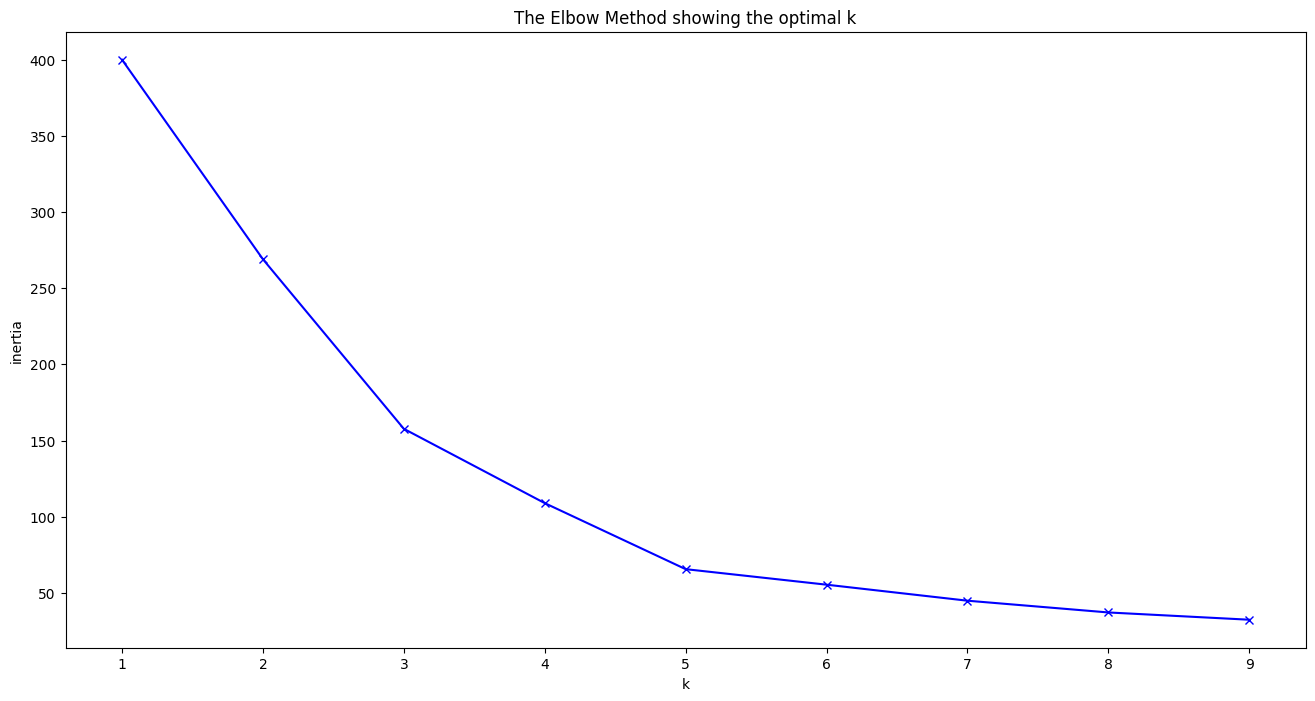

In [82]:
optimal_k_values = optimal_k(df[['Annual_Income_(k$)', 'Spending_Score_(1-100)']], 10)

As seen from the plot, the optimal number of clusters is 3. Therefore we will use 3 clusters to segment the customers.

#### Applying KMeans

In [83]:
# create a KMeans instance with 3 clusters
kmeans= KMeans(n_clusters=3, n_init=10)
kmeans.fit(df[['Annual_Income_(k$)', 'Spending_Score_(1-100)']])


KMeans(n_clusters=3, n_init=10)

In [84]:
# create a new column in the dataframe for the cluster
df['cluster'] = kmeans.labels_

In [85]:
df.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100),cluster
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801,0
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704,0
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913,0
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418,0
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980,0


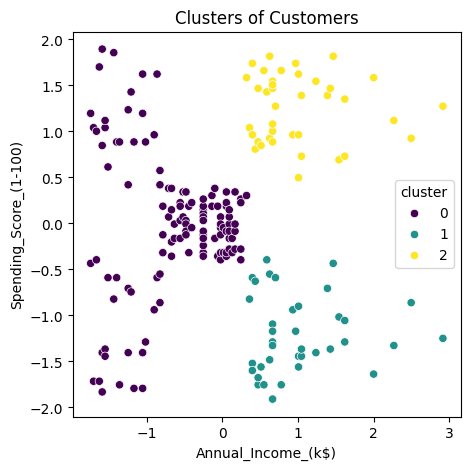

In [86]:
# plot the clusters
plt.figure(figsize=(5,5))
sns.scatterplot(data=df, x='Annual_Income_(k$)', y='Spending_Score_(1-100)', hue='cluster', palette='viridis')
plt.title('Clusters of Customers')
plt.show()


#### Creating multiple clusters.

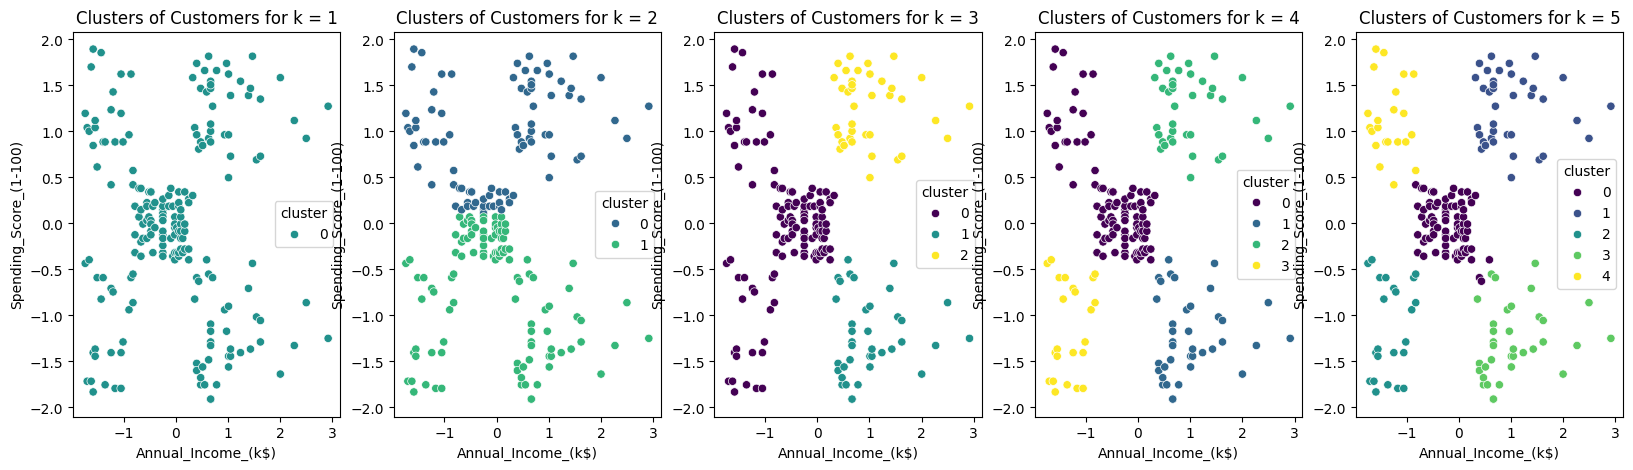

In [87]:
# create multiple clusters using a subplots
fig, ax = plt.subplots(1, 5, figsize=(20, 5))

for i, ax in enumerate(fig.axes, start =1):
    kmeans= KMeans(n_clusters=i, n_init=10)
    kmeans.fit(df[['Annual_Income_(k$)', 'Spending_Score_(1-100)']])
    df['cluster'] = kmeans.labels_
    sns.scatterplot(data=df, x='Annual_Income_(k$)', y='Spending_Score_(1-100)', hue='cluster', palette='viridis', ax=ax)
    ax.set_title(f'Clusters of Customers for k = {i}')


Note: Insight for the above code was gotten from a youtube tutorial on youbute (https://www.youtube.com/watch?v=iNlZ3IU5Ffw&t=883s)

Clustering with the Age and Spending Score features

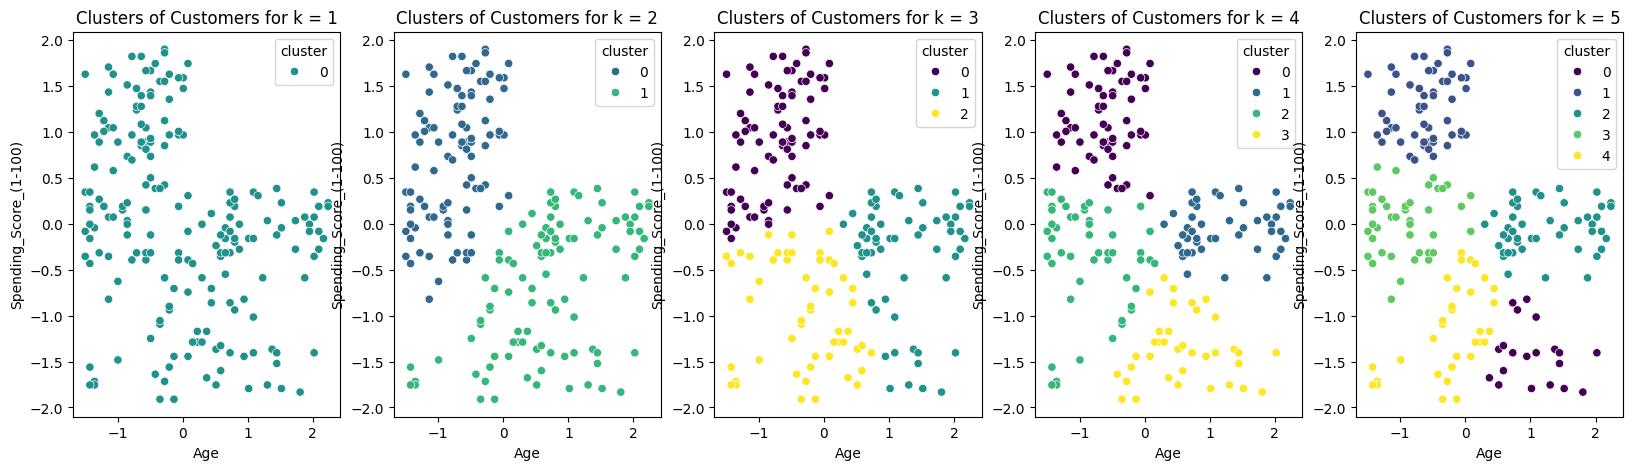

In [88]:
# Creating similar clusters using the Age and Spending Score
fig, ax = plt.subplots(1, 5, figsize=(20, 5))

for i, ax in enumerate(fig.axes, start =1):
    kmeans= KMeans(n_clusters=i, n_init=10)
    kmeans.fit(df[['Age', 'Spending_Score_(1-100)']])
    df['cluster'] = kmeans.labels_
    sns.scatterplot(data=df, x='Age', y='Spending_Score_(1-100)', hue='cluster', palette='viridis', ax=ax)
    ax.set_title(f'Clusters of Customers for k = {i}')

Clustering witht the Gender and spending score features

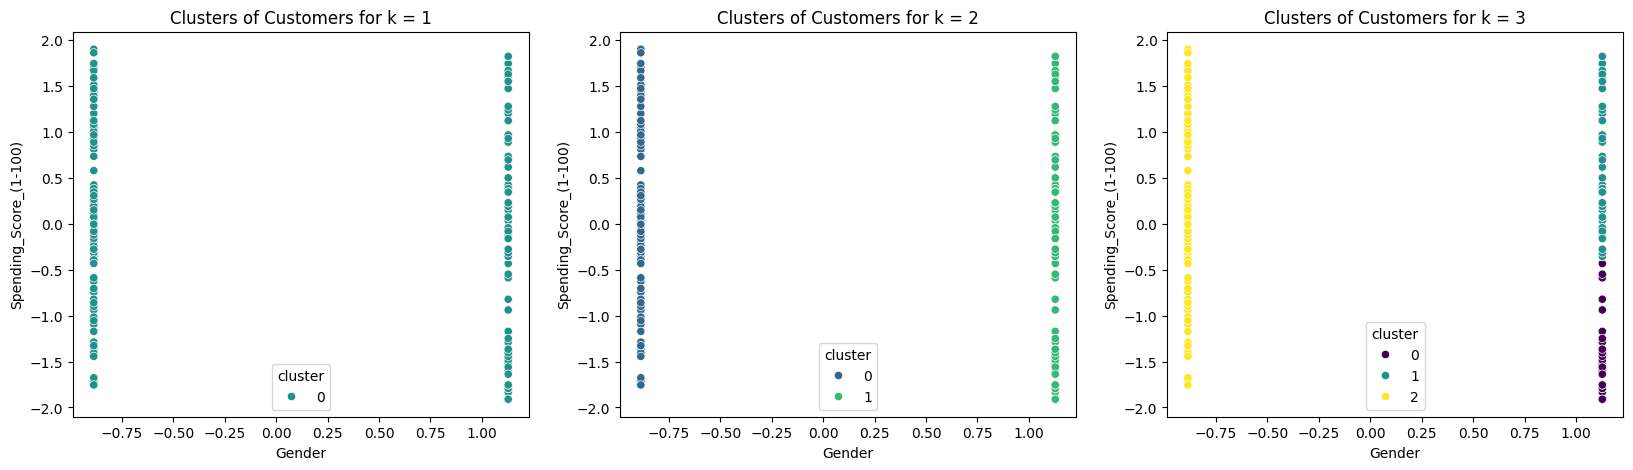

In [89]:
# Creating similar clusters using the Gender and Spending Score
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for i, ax in enumerate(fig.axes, start =1):
    kmeans= KMeans(n_clusters=i, n_init=10)
    kmeans.fit(df[['Gender', 'Spending_Score_(1-100)']])
    df['cluster'] = kmeans.labels_
    sns.scatterplot(data=df, x='Gender', y='Spending_Score_(1-100)', hue='cluster', palette='viridis', ax=ax)
    ax.set_title(f'Clusters of Customers for k = {i}')

Since there are only two unique genders, it is not appriopriate to create more than two clusters for the feature.

BIBLIOGRAPHY

https://www.kaggle.com/code/kushal1996/customer-segmentation-k-means-analysis/input